In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [61]:
df = pd.read_csv('C:/Users/keteb/OneDrive/Bureau/github/Portfolio_clusturing/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.dropna() 

df_cleaned = df_cleaned.transpose() 

In [35]:
df_cleaned

ticker,AA,ABM,ABT,ADI,ADM,ADX,AEE,AEG,AEM,AEP,...,XLI,XLK,XLP,XLU,XLV,XLY,XOM,XRX,YUM,ZTR
03/01/2000,-0.013042,-0.009188,-0.007117,-0.036071,0.000000,-0.001867,-0.007707,0.014739,-0.008658,-0.017734,...,-0.021967,-0.003376,-0.016349,-0.017490,-0.022942,-0.028632,-0.016647,0.034169,-0.032952,0.000000
04/01/2000,0.010043,0.012346,-0.012786,-0.044261,0.005277,-0.005666,0.000000,-0.018361,0.018019,0.013848,...,-0.014930,-0.025793,-0.009145,-0.031198,-0.019337,-0.015915,-0.007296,-0.047628,-0.011895,0.018868
05/01/2000,0.047628,-0.006192,0.011111,0.014493,-0.015915,0.000000,0.037955,-0.012089,-0.017858,0.036648,...,-0.002794,0.001810,0.010471,0.002866,-0.014799,-0.016645,0.037740,0.021506,0.000000,0.009479
06/01/2000,-0.011713,0.000000,0.032553,-0.027719,0.010695,0.005742,-0.003731,-0.003409,0.026907,0.013270,...,0.013341,-0.022196,0.011656,0.000000,0.004255,0.004829,0.052842,0.007926,-0.001714,0.009390
07/01/2000,-0.016118,0.003091,0.028573,0.033654,0.005249,0.003810,0.012975,0.000667,0.026202,0.007463,...,0.025864,0.027331,0.043898,0.006845,0.011073,0.035384,-0.011705,0.023408,-0.022551,0.009217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/12/2020,-0.017156,-0.011338,0.008434,0.002495,0.000607,-0.000584,0.008141,0.000000,0.012527,0.007149,...,-0.001363,0.004893,0.004205,0.004913,0.002425,0.001141,-0.001201,-0.014509,0.002980,0.003446
28/12/2020,0.006315,0.009932,-0.010796,-0.011887,-0.002010,0.004078,0.001565,-0.005128,-0.027193,-0.005643,...,-0.005320,0.001380,0.004172,-0.000813,-0.002681,0.001630,0.001199,0.020396,0.011820,0.005705
29/12/2020,-0.004527,-0.024098,-0.001568,-0.010525,-0.008056,-0.004066,-0.003650,-0.012772,0.004506,-0.003320,...,-0.011128,-0.010187,-0.005503,-0.002600,0.000089,-0.003188,-0.018486,-0.019023,-0.001643,0.000000
30/12/2020,0.039099,-0.002646,-0.002303,0.010522,0.009259,0.001745,0.004819,0.000000,0.005840,0.005659,...,0.004663,-0.003997,-0.002237,0.004380,-0.002224,0.002430,0.006512,0.010099,0.001462,-0.002275


In [36]:
serie = df_cleaned['AA']


resultats_adf = adfuller(serie)

In [37]:
print('Valeur p :', resultats_adf[1])
resultats_adf[1] < 0.01

Valeur p : 2.7739932245550333e-30


True

In [38]:
s = 0
n = df_cleaned.shape[1]

for i in range(n):
    serie = df_cleaned.iloc[:, i]
    resultats_adf = adfuller(serie)
    if resultats_adf[1] < 0.01 :
        s+=1
print(s/n * 100)    

100.0


In [39]:
cons = df_cleaned[['AA', 'ABM', 'APD', 'LDL', 'LNN']].mean(axis=1) # industries
phar = df_cleaned[['ABT', 'AZN', 'JNJ', 'NVO', 'LLY']].mean(axis=1) # pharmaceutique
fin = df_cleaned[['ALL', 'AIG', 'ADX', 'AFL', 'AFG']].mean(axis=1) # finance

In [32]:

X = phar
Y = fin

# Ajouter une constante à X (intercept)
X = sm.add_constant(X)

# Ajuster le modèle de régression linéaire
modele = sm.OLS(Y, X, missing='drop')

resultats = modele.fit() # On fit la régression linéaire
resultats.model.exog_names[1] = 'phar'

# Afficher les résultats de la régression
print("Résultats de la régression linéaire :")
print(resultats.summary())


residus = resultats.resid # Calculer les résidus

# On effectue le test de Dickey-Fuller augmenté (ADF) sur les résidus
print("\nTest de stationnarité des résidus :")
resultats_adf = adfuller(residus)
print(f"p-val : {resultats_adf[1]} , elle est inférieur au seuil 1%, on rejette H0 donc on a stationnarité des résidus ")



Résultats de la régression linéaire :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     1706.
Date:                Sun, 05 May 2024   Prob (F-statistic):          1.98e-323
Time:                        14:06:18   Log-Likelihood:                 15594.
No. Observations:                5279   AIC:                        -3.118e+04
Df Residuals:                    5277   BIC:                        -3.117e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

In [40]:

X = cons
Y = fin

# Ajouter une constante à X (intercept)
X = sm.add_constant(X)

# Ajuster le modèle de régression linéaire
modele = sm.OLS(Y, X, missing='drop')

resultats = modele.fit() # On fit la régression linéaire
resultats.model.exog_names[1] = 'cons'

# Afficher les résultats de la régression
print("Résultats de la régression linéaire :")
print(resultats.summary())


residus = resultats.resid # Calculer les résidus

# On effectue le test de Dickey-Fuller augmenté (ADF) sur les résidus
print("\nTest de stationnarité des résidus :")
resultats_adf = adfuller(residus)
print(f"p-val : {resultats_adf[1]} , elle est inférieur au seuil 1%, on rejette H0 donc on a stationnarité des résidus ")



Résultats de la régression linéaire :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2814.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        14:11:12   Log-Likelihood:                 15983.
No. Observations:                5279   AIC:                        -3.196e+04
Df Residuals:                    5277   BIC:                        -3.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

In [46]:
s = 0

for i in range(50):
    for j in range(i, 50):

        X = df_cleaned.iloc[:, j]
        Y = df_cleaned.iloc[:, i]

        # Ajouter une constante à X (intercept)
        X = sm.add_constant(X)

        # Ajuster le modèle de régression linéaire
        modele = sm.OLS(Y, X, missing='drop')

        resultats = modele.fit() # On fit la régression linéaire
        resultats.model.exog_names[1] = 'AA'

        residus = resultats.resid # Calculer les résidus

        # On effectue le test de Dickey-Fuller augmenté (ADF) sur les résidus
        resultats_adf = adfuller(residus)

        if resultats_adf[1] < 0.01:
            s += 1



0.5582060851298456


In [59]:
print((2*s)/(50*(50-1)) * 100) # pour un échantillon de 50 actifs 


100.0


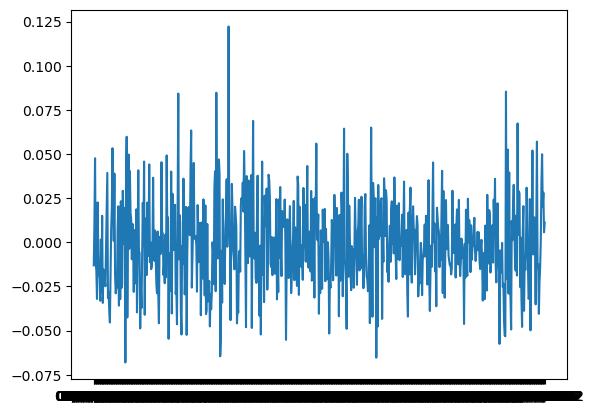

In [48]:
plt.plot(df_cleaned.iloc[:700, 0])
plt.show()

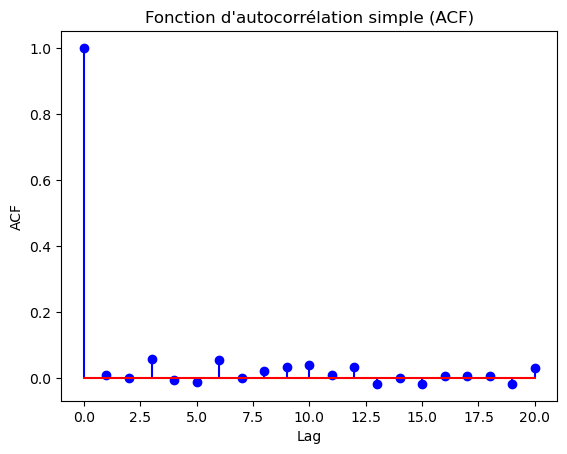

In [58]:
acf, confint = sm.tsa.acf(df_cleaned.iloc[:, 0], nlags=20, fft=False, alpha=0.05)

# Tracer l'ACF
plt.stem(acf, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Fonction d\'autocorrélation simple (ACF)')
plt.show()

- on ne voit pas de saisonnalité apparente 